In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

# Data Wrangling

## Gathering Data

In [2]:
# Load & read data
df = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [5]:
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


There are 3 columns which have missing values:
- Certificate
- Meta Score
- Gross

In [6]:
print("Num of duplicated data :", df.duplicated().sum())

Num of duplicated data : 0


In [7]:
# Check 'Released_Year' values
df['Released_Year'].value_counts()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: count, Length: 100, dtype: int64

In [8]:
df[df['Released_Year']=='PG']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


There is a wrong input in 'Released_Year' in the movie 'Apollo 13', which should be the year of release, not a 'PG'; Apollo 13 released year is 1995

In [9]:
cond = df['Series_Title'] == 'Apollo 13'
df.loc[cond, 'Released_Year']=df.loc[cond, 'Released_Year'].replace('PG', '1995')

In [10]:
df[df['Series_Title']=='Apollo 13']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [11]:
# Check 'Certificate' values 
df['Certificate'].value_counts()

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

The most certificate of the movie is 'U'

## Data Cleaning

In [12]:
#Change type data

# Convert runtime to float
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
# Convert Gross to numeric
df['Gross'] = df['Gross'].str.replace('[\$,]', '', regex=True).astype(float)
# Drop rows with missing values in the 'Certificate' column
df.reset_index(drop=True, inplace=True)
# Check the cleaned DataFrame

In [13]:
# Check type data
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [14]:
# Fill the 'Certificate' null values with the most category appear
df['Certificate'].fillna('U',inplace=True)

In [15]:
# Fill the 'Meta_score' null values with the average of values
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

In [16]:
# Fill the 'Gross' null values with the average value
df['Gross'].fillna(df['Gross'].mean(),inplace=True)
# converting float type to int
df['Gross'] = df['Gross'].astype(int)

In [17]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 125.1+ KB


In [18]:
# Create list of Genres
for i in range(df.shape[0]):
    df['Genre'][i] = df['Genre'][i].split(', ')

In [19]:
# Merge star to list
df['Stars'] = ''
for i in range(df.shape[0]):
    df['Stars'][i] = [df['Star1'][i], df['Star2'][i], df['Star3'][i], df['Star4'][i]]
    
df.drop(['Star1','Star2','Star3','Star4'],axis=1,inplace=True)

In [20]:
df['Stars'].head()

0    [Tim Robbins, Morgan Freeman, Bob Gunton, Will...
1    [Marlon Brando, Al Pacino, James Caan, Diane K...
2    [Christian Bale, Heath Ledger, Aaron Eckhart, ...
3    [Al Pacino, Robert De Niro, Robert Duvall, Dia...
4    [Henry Fonda, Lee J. Cobb, Martin Balsam, John...
Name: Stars, dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  No_of_Votes    1000 non-null   int64  
 11  Gross          1000 non-null   int64  
 12  Stars          1000 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 101.7+ KB


In [22]:
df.to_csv('/kaggle/working/df_clean.csv', index=False)

# Exploratory Data Analysis & Visualization

In [23]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,No_of_Votes,Gross,Stars
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,2343110,28341469,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"[Crime, Drama]",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,1620367,134966411,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"[Action, Crime, Drama]",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,2303232,534858444,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"[Crime, Drama]",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,1129952,57300000,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"[Crime, Drama]",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,689845,4360000,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John..."


**Q1: Which movies has the highest revenue?**

In [24]:
df2 = pd.DataFrame(df[['Series_Title', 'Gross']].sort_values(by=['Gross'], ascending=False).reset_index(drop=True))
print('Top 10 Movies with the highest revenue:')
df2.rename(columns={'Series_Title': 'Movie_Title', 'Gross':'Revenue'}, inplace=True)
df2.head(10)

Top 10 Movies with the highest revenue:


,Movie_Title,Revenue
0,Star Wars: Episode VII - The Force Awakens,936662225
1,Avengers: Endgame,858373000
2,Avatar,760507625
3,Avengers: Infinity War,678815482
4,Titanic,659325379
5,The Avengers,623279547
6,Incredibles 2,608581744
7,The Dark Knight,534858444
8,Rogue One,532177324
9,The Dark Knight Rises,448139099


In [25]:
print('Movie with the highest revenue:\n', df2['Movie_Title'][0])
print('\nwith a revenue by:\n',"${}".format(df2['Revenue'][0]))

Movie with the highest revenue:
 Star Wars: Episode VII - The Force Awakens

with a revenue by:
 $936662225


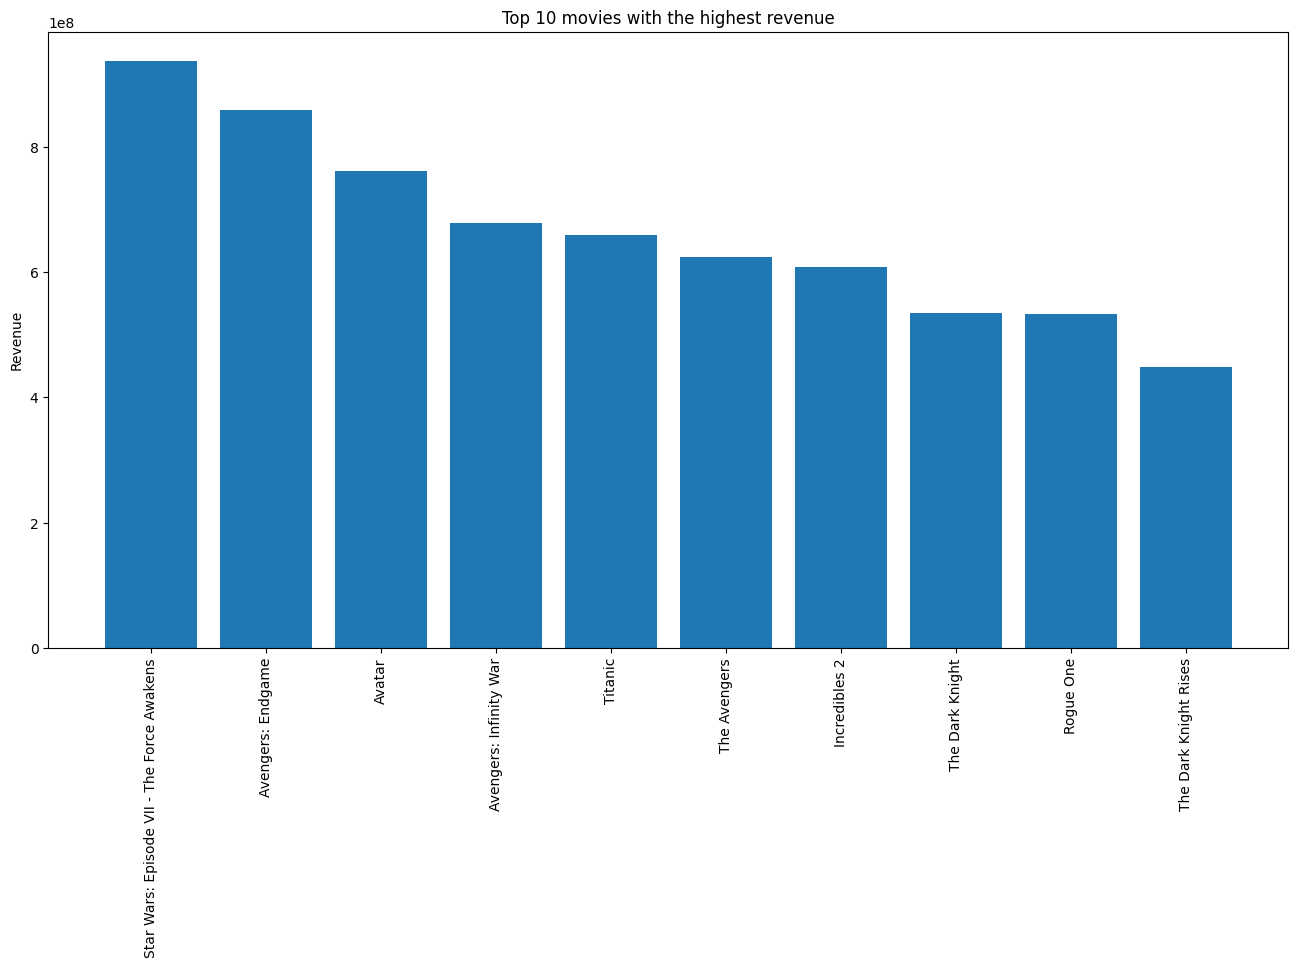

In [26]:
df2_vis=df2.head(10).reset_index(drop=True)
# colors=['#053B50', '#B9B4C7', '#B9B4C7', '#B9B4C7', '#B9B4C7', '#B9B4C7',
#          '#B9B4C7', '#B9B4C7', '#B9B4C7', '#B9B4C7']
plt.figure(figsize=(16, 8))
plt.bar(df2_vis['Movie_Title'], df2_vis['Revenue'])
plt.xticks(rotation=90)
plt.title('Top 10 movies with the highest revenue')
plt.ylabel('Revenue')
plt.show()

**Q2: Which genres are the most common?**

In [27]:
df3 = pd.DataFrame(df['Genre'].explode().value_counts().reset_index(name='Count'))
df3.head(10)

,Genre,Count
0,Drama,724
1,Comedy,233
2,Crime,209
3,Adventure,196
4,Action,189
5,Thriller,137
6,Romance,125
7,Biography,109
8,Mystery,99
9,Animation,82


Drama is the most common genre.

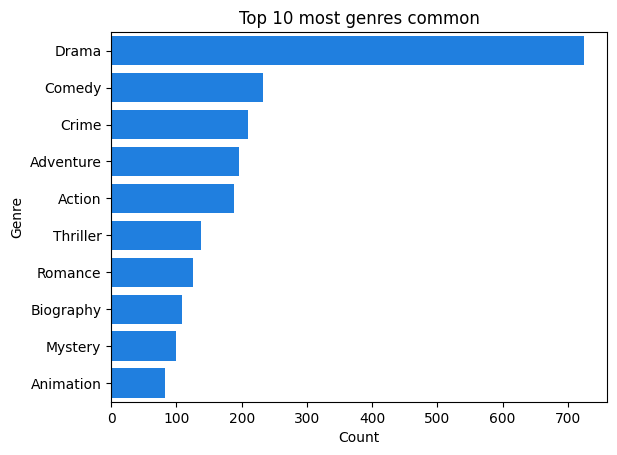

In [52]:
df3_vis = df3.head(10)
sns.barplot(x='Count', y='Genre', data=df3_vis, orient='h',
            order=df3_vis['Genre'], color='#007FFF')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 most genres common')
plt.show()

**Q3: How distribution between movie runtime and number of votes?**

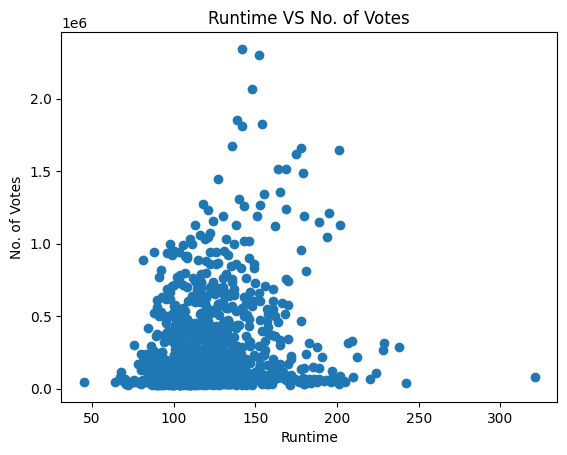

In [37]:
plt.scatter(df['Runtime'],df['No_of_Votes'])
plt.title('Runtime VS No. of Votes')
plt.xlabel('Runtime')
plt.ylabel('No. of Votes')
plt.show()

By the graph, we can conclude that:
- Movies with much higher runtime gets very few votes.
- Only a few movies with average runtime get a high number of votes.


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  No_of_Votes    1000 non-null   int64  
 11  Gross          1000 non-null   int64  
 12  Stars          1000 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 101.7+ KB


**Q4: Which directors got the highest number of votes on his movies?**

In [44]:
df4 = pd.DataFrame(df.groupby(by=['Director'])['No_of_Votes'].sum()
                   .reset_index(name='No_of_Votes'))
df4.sort_values(by=['No_of_Votes'], ascending=False).reset_index(drop=True).head(10)

,Director,No_of_Votes
0,Christopher Nolan,11578345
1,Quentin Tarantino,8123208
2,Steven Spielberg,7817166
3,David Fincher,6607859
4,Martin Scorsese,6513530
5,Peter Jackson,6148579
6,James Cameron,4613107
7,Ridley Scott,4339890
8,Robert Zemeckis,4055464
9,Stanley Kubrick,3919254


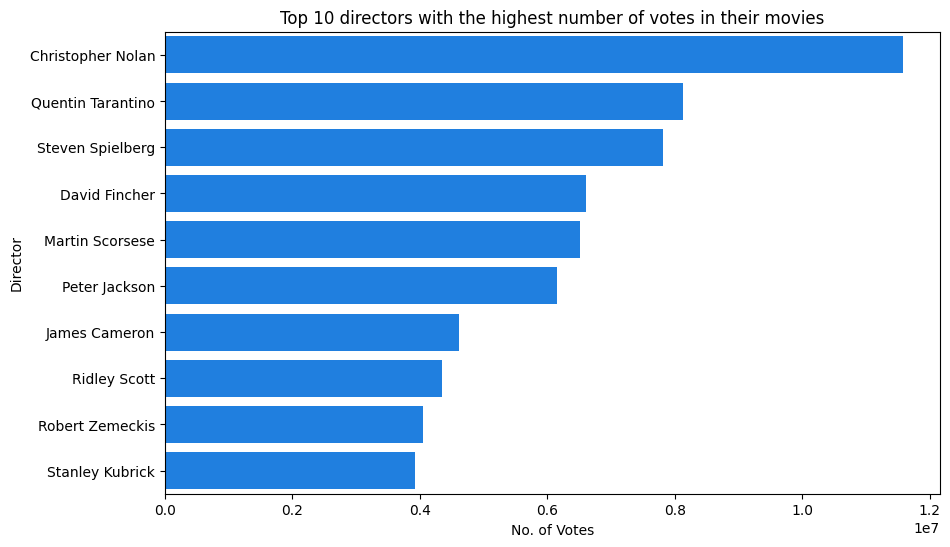

In [51]:
df4_vis = df4.sort_values(by=['No_of_Votes'], ascending=False).reset_index(drop=True).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='No_of_Votes', y='Director', data=df4_vis, orient='h',
            order=df4_vis['Director'], color='#007FFF')
plt.xlabel('No. of Votes')
plt.ylabel('Director')
plt.title('Top 10 directors with the highest number of votes in their movies')
plt.show()

**Q5: Number of movies each director created**

In [54]:
df5 =  pd.DataFrame(df.groupby(by=['Director'])['Series_Title'].count()
                   .reset_index(name='No_of_Movie'))
df5.sort_values(by=['No_of_Movie'], ascending=False).reset_index(drop=True).head(10)

,Director,No_of_Movie
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10
5,Stanley Kubrick,9
6,Woody Allen,9
7,Billy Wilder,9
8,Quentin Tarantino,8
9,Christopher Nolan,8


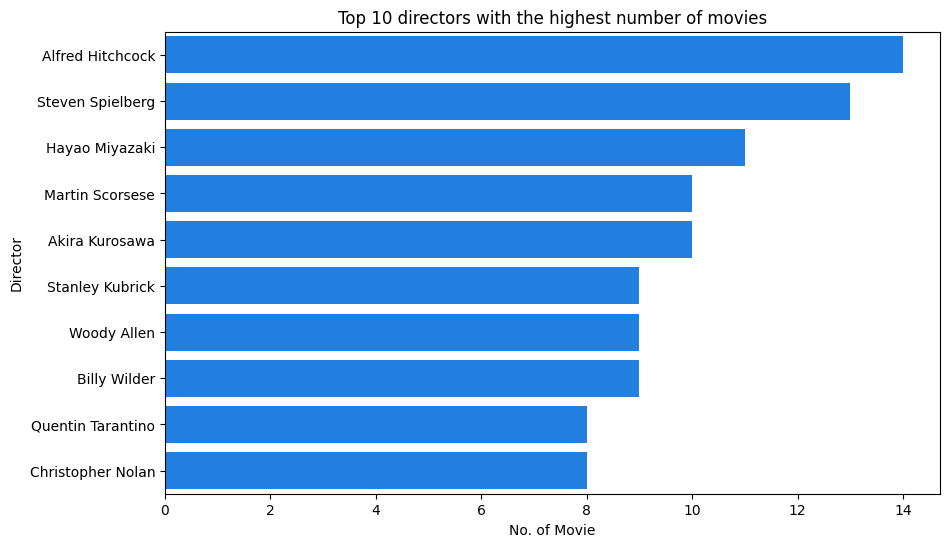

In [58]:
df5_vis = df5.sort_values(by=['No_of_Movie'], ascending=False).reset_index(drop=True).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='No_of_Movie', y='Director', data=df5_vis, orient='h',
            order=df5_vis['Director'], color='#007FFF')
plt.xlabel('No. of Movie')
plt.ylabel('Director')
plt.title('Top 10 directors with the highest number of movies')
plt.show()